# Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem defition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evalutation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
# Importing necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
# Importing data
df= pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
# Checking for missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

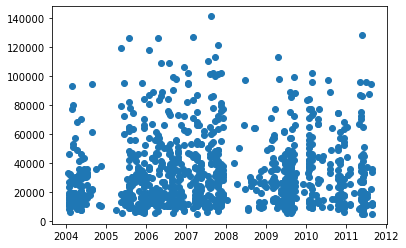

In [5]:
# Visualizing data
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

Text(0.5, 0, 'Sales Price')

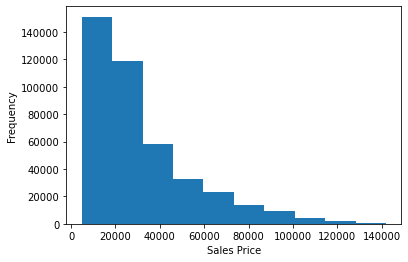

In [6]:
df.SalePrice.plot.hist()
plt.xlabel("Sales Price")

In [7]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head(3).T

,0,1,2
SalesID,1139246,1139248,1139249
SalePrice,66000,57000,10000
MachineID,999089,117657,434808
ModelID,3157,77,7009
datasource,121,121,121
auctioneerID,3,3,3
YearMade,2004,1996,2001
MachineHoursCurrentMeter,68,4640,2838
UsageBand,Low,Low,High
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00


In [9]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [10]:
### Sorting DataFrame by saledate

df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [11]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
### Make a copy of the original DataFrame
df_temp = df.copy()

In [13]:
df_temp.saledate.head(30)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
144032   1989-01-31
54438    1989-01-31
144952   1989-01-31
205752   1989-01-31
28927    1989-01-31
86971    1989-01-31
67034    1989-01-31
87602    1989-01-31
53101    1989-01-31
205784   1989-01-31
Name: saledate, dtype: datetime64[ns]

## Feature engineering

Add date time parameters for `saledate` column

In [14]:
df_temp['sale_year']=df_temp.saledate.dt.year
df_temp['sale_month']=df_temp.saledate.dt.month
df_temp['sale_day']=df_temp.saledate.dt.day
df_temp['sale_day_of_week']=df_temp.saledate.dt.dayofweek
df_temp['sale_day_of_year']=df_temp.saledate.dt.dayofyear

In [15]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
# We don't need saledate column since we have already enriched our df_temp with all necessary info
df_temp.drop('saledate',axis=1,inplace=True)

In [17]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sale_year,sale_month,sale_day,sale_day_of_week,sale_day_of_year
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [18]:
# Check the value of different columns
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [19]:
## Modelling 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state=42)

In [20]:
# Converting string into categories

#Find the columns and updating strings into categories
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()

In [21]:
# Checking missing values
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data

In [22]:
# Export current tmp dataframe
df_temp.to_csv("train_temp.csv",index=False)

In [23]:
# Import preprocessed data
df_temp = pd.read_csv("train_temp.csv",low_memory=False)

### Filling missing values

In [24]:
# Filling numeric values with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding a binary column to indicate value was missing or not
            df_temp[label+'_is_missing']=pd.isnull(content)
            #Filling missing values with median
            df_temp[label]=content.fillna(content.median())

In [25]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling and turning categorical variables into numbers

In [26]:
#  Turn categorical variables into numebrs and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indciate whether sample had missing value
        df_temp[label+'_is_missing']=pd.isna(content)
        # Turn categories into numbers and add 1
        df_temp[label]=pd.Categorical(content).codes+1
        #Adding One because missing values is assigned -1 for categorical values

        

In [27]:
pd.Categorical(df['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [29]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [31]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [32]:
# Split data into training and validation
df_validation = df_temp[df_temp.sale_year == 2012]
df_train = df_temp[df_temp.sale_year != 2012]

# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_validation.drop("SalePrice", axis=1), df_validation.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape




((401125, 102), (401125,), (11573, 102), (11573,))

# Building an evaluation function

In [33]:
# Create evalation function
from sklearn.metrics import mean_squared_log_error,mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculate RMSE between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    validation_preds = model.predict(X_valid)
    scores = {"Training MAE :" :mean_absolute_error(y_train,train_preds)
             ,"Valid MAE: ":mean_absolute_error(y_valid,validation_preds),
             "Training RMSLE":rmsle(y_train,train_preds),
             "Validation RMSLE":rmsle(y_valid,validation_preds),
             "Training R^2": r2_score(y_train,train_preds),
             "Validation R^2": r2_score(y_valid,validation_preds)}
    return scores
    

### Testing our model on a subset (to tune the hyperparameters)

In [34]:
# change max_samples value to cut down value

model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)


In [35]:
%%time

model.fit(X_train,y_train)

Wall time: 22.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [36]:
show_scores(model)

{'Training MAE :': 5561.2988092240585,
 'Valid MAE: ': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

### Hyper Parameter tuning with RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyper parameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,'sqrt','auto'],
           "max_samples":[10000]
          }

#Instantiage  RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

# Fit the RandomizedSearch CV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
# Best params for the regressor
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [39]:
tuned_model=RandomForestRegressor(n_estimators= 40,
 min_samples_split= 16,
 min_samples_leaf= 3,
max_samples=10000,                                
 max_features=0.5,random_state=42)
tuned_model.fit(X_train,y_train)

show_scores(rs_model)

{'Training MAE :': 11777.777883448523,
 'Valid MAE: ': 13648.824755741687,
 'Training RMSLE': 0.5058656936430681,
 'Validation RMSLE': 0.5187910218553219,
 'Training R^2': 0.48458291192536096,
 'Validation R^2': 0.48368053354412754}

## Make predictions on the Test Data


In [40]:
df_test = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing the data

In [42]:
def preprocess_data(df):
    """
    Perform transformations on df and returns transformed df
    """
    df['sale_year']=df.saledate.dt.year
    df['sale_month']=df.saledate.dt.month
    df['sale_day']=df.saledate.dt.day
    df['sale_day_of_week']=df.saledate.dt.dayofweek
    df['sale_day_of_year']=df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    #Fill the numeric columns with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Adding a binary column to indicate value was missing or not
                df[label+'_is_missing']=pd.isnull(content)
                #Filling missing values with median
                df[label]=content.fillna(content.median())
    #  Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            #Add binary column to indciate whether sample had missing value
            df[label+'_is_missing']=pd.isna(content)
            # Turn categories into numbers and add 1
            df[label]=pd.Categorical(content).codes+1
            #Adding One because missing values is assigned -1 for categorical values
    
    return df

In [43]:
df_test= preprocess_data(df_test)
df_test.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,2,963,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,2,1745,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,336,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,3716,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,3,4261,...,True,True,True,True,True,True,True,True,True,True


In [50]:
test_preds = tuned_model.predict(df_test.drop('SalePrice',axis=1))
test_preds

In [57]:
#Formatting into the requried format
df_preds = pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds["ActualPrice"]=df_test["SalePrice"]
df_preds

,SalesID,SalesPrice,ActualPrice
0,1139246,56876.407724,66000.0
1,1139248,58338.607295,57000.0
2,1139249,12322.577187,10000.0
3,1139251,36952.171807,38500.0
4,1139253,14222.733336,11000.0
...,...,...,...
412693,6333344,11805.184807,10000.0
412694,6333345,13515.868505,10500.0
412695,6333347,12683.537435,12500.0
412696,6333348,15193.441715,10000.0


### Feature Importance



In [58]:
tuned_model.feature_importances_

array([2.72234219e-02, 2.05841335e-02, 4.37767911e-02, 1.40129662e-03,
       3.12749622e-03, 2.04432508e-01, 3.14096704e-03, 1.35020606e-03,
       4.53920867e-02, 3.17171110e-02, 6.63018128e-02, 3.24771457e-03,
       2.10636091e-02, 1.59009537e-01, 4.40228433e-02, 5.28284293e-03,
       4.65641171e-03, 5.19514168e-03, 3.74396105e-03, 7.21693187e-02,
       5.51904962e-04, 4.97518706e-05, 6.81076551e-04, 1.80065224e-04,
       1.61118380e-03, 4.92706039e-04, 3.64928308e-03, 9.00985400e-03,
       3.61858758e-03, 2.28421665e-03, 3.27774825e-03, 1.76897313e-03,
       3.01462048e-03, 4.10543756e-04, 2.84614091e-04, 1.47331791e-02,
       1.16304848e-03, 1.66230817e-02, 2.44128495e-03, 3.53956099e-03,
       6.13479031e-04, 1.43082550e-03, 3.02051995e-03, 7.52914787e-04,
       5.49591243e-04, 3.59865390e-04, 1.11459628e-04, 3.26757755e-03,
       1.08186261e-03, 2.50577205e-04, 1.15453308e-04, 5.55698740e-02,
       2.75350017e-03, 6.15095371e-03, 2.44625707e-03, 7.82460256e-03,
      

In [62]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df =( pd.DataFrame({"features": columns,
                        "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

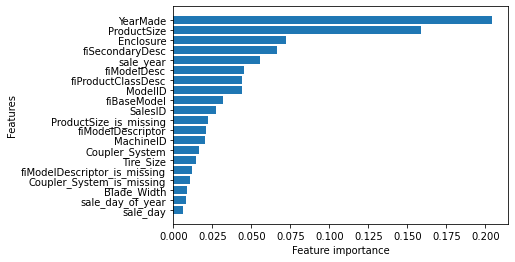

In [63]:
plot_features(X_train.columns, tuned_model.feature_importances_)